In [318]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#画图中的显示中文
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
from factor_analyzer import FactorAnalyzer

## 自变量数据处理

In [319]:
## 导入数据
# predata = pd.read_excel('pre_data.xlsx', sheet_name='0122提交N=3000')
predata.head()
predata.info()
predata.describe()
cdata=predata.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 2527 entries, NO to B5
dtypes: float64(2076), int64(391), object(60)
memory usage: 57.8+ MB


In [320]:
## 导入删除的id数目
with open ('delete_id.txt', encoding= 'utf-8') as f:
    delete_id=f.read()
delete = delete_id.split('\n')[0:-1]
new_del=[]
new_del=[int(i) for i in delete]
# new_del

print(len(cdata))
print(len(new_del))

## 删除数据
for i in new_del:
    cdata = cdata.drop(index=(predata.loc[(predata['NO']==i)].index))
print(len(cdata))
cdata.loc[(cdata['NO']==new_del[1])]

3000
106
2894


,NO,S1,S2,S3t1,S4,S5c1,S5c2,S5c3,S5c4,S5c5,...,B1s16,B1s17,B1s18,B1s19,B1s20,B2,B2t21,B3,B4,B5


In [321]:
## 挑选适合的变量
data=cdata[['NO','S1','S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7','E4','E6c1','E6c2','E6c3','E6c4','E6c5','U1','U3','B1s1','B1s2','B1s3','B1s4','B1s5','B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15','B1s16','B1s17','B1s18','B1s19','B1s20']]
# 'NO','S1','S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E1','E4','E6','U1','U3'
# data['E1t7'].fillna(0, inplace=True)
# data['E6t5'].fillna(0, inplace=True)

## E1表示平台的数量
E1dat = data[['E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7']]
E1=[]
for index, row in E1dat.iterrows():
    E1.append(sum(row))

## E6表示设备的数量
E6dat = data[['E6c1','E6c2','E6c3','E6c4','E6c5']]
E6=[]
for index, row in E6dat.iterrows():
    E6.append(sum(row))
    
data = data.drop(['E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7'],axis=1)
data = data.drop(['E6c1','E6c2','E6c3','E6c4','E6c5'], axis=1)
data['E1']=E1
data['E6']=E6
data.shape

(2894, 42)

In [322]:
## 查看有无空值
print(data.isnull().any().any())
print(data.isnull().sum())

## 将S9的空值替换成8,表明一年一次弹奏
data['S9'].fillna(8, inplace=True)
## 将F1的空值替换成2，默认为否，表明不会多种乐器
data['F1'].fillna(2, inplace=True)

# 再次查看有无空值
data.isnull().any().any()

True
NO         0
S1         0
S2         0
S3t1       0
S4         0
B2         0
B3         0
B4         0
B5         0
S6         0
S7         0
S9       677
S11        0
F1       123
H2         0
H4         0
H5         0
E4         0
U1         0
U3         0
B1s1       0
B1s2       0
B1s3       0
B1s4       0
B1s5       0
B1s6       0
B1s7       0
B1s8       0
B1s9       0
B1s10      0
B1s11      0
B1s12      0
B1s13      0
B1s14      0
B1s15      0
B1s16      0
B1s17      0
B1s18      0
B1s19      0
B1s20      0
E1         0
E6         0
dtype: int64


False

In [323]:
len(data)

2894

## 因变量处理

In [324]:
#### 导入因变量
ydata = pd.read_excel('ydata.xlsx')

## 把品牌分成低中高三档
# 第一档 AVG<=480  第二档 AVG<=640    第三档 AVG > 640
print(sum(ydata['AVG']<=480))
print(sum(ydata['AVG']<=640)-sum(ydata['AVG']<=480))
print(sum(ydata['AVG']>640))

level=[]
AVG=ydata['AVG']
for i in range(len(ydata)):
    if (AVG[i]<=480):
        num=1
        level.append(num)
    if (AVG[i]>480 and AVG[i]<=640):
        level.append(2)
    if (AVG[i]>640):
        num=3
        level.append(num)

ydata['level']=level
ydata

10
9
9


,LABEL,CAT,AVG,0.25,0.5,0.75,level
0,Acoustic Guitar,C1c1,431.331652,120.00,250.0,500.00,1
1,Electric Guitar,C1c2,484.237154,200.00,300.0,500.00,2
2,Acoustic-Electric Guitar,C1c3,550.636752,120.00,300.0,590.75,2
3,Ukulele,C1c4,190.671053,54.75,100.0,204.00,1
4,Acoustic Bass & Acoustic-Electric Bass,C1c5,759.978261,120.00,390.0,762.25,3
5,Electric Bass,C1c6,586.525641,250.00,450.0,700.00,2
6,Mandolin,C1c7,464.111111,200.00,350.0,750.00,1
7,Banjo,C1c8,495.217391,200.00,325.0,726.00,2
8,Sitar,C1c9,647.200000,212.50,332.5,1175.00,3
9,Piano,C1c10,1798.701493,356.00,800.0,2000.00,3


In [325]:
label_data=cdata[['C1c1','C1c2','C1c3','C1c4','C1c5','C1c6','C1c7','C1c8','C1c9','C1c10','C1c11','C1c12','C1c13','C1c14','C1c15','C1c16','C1c17','C1c18','C1c19','C1c20','C1c21','C1c22','C1c23','C1c24','C1c25','C1c26','C1c27','C1c28']]
num_label=[]
for index, row in label_data.iterrows():
    num_label.append(sum(row))
num_label
label_data['num']=num_label


## 删除掉其他选项买乐器的人
data['num']=num_label
for i in num_label:
    data = data.drop(index=(data.loc[(data['num']==0)].index))  #只剩下2800个
print(len(data))

2800


In [326]:
## 寻找每个品牌种类的位置
idx=[]
for i,row in label_data.iterrows():
    if(row[-1]==1):
        idx.append(int(np.where(row[0:-1]==1)[0]))
    else:
        num=np.where(row[0:-1]==1)[0]
        if(len(num)>0):
            idx.append(num[-1])
print(len(idx))

## 确认价格level
level_idx=[]
for i in idx:
    level_idx.append(level[i])
len(level_idx)

data['level']=level_idx

2800


In [13]:
# data.describe()
# # 安德鲁斯曲线
# plt.rcParams['figure.figsize'] = (15, 10)
# #第0轴沿着行的方向垂直向下，第1轴沿着列的方向水平延申。
# plotting.andrews_curves(data.drop('NO',axis=1),'S2')
# plt.title('Andrew Curves for Gender', fontsize = 20)
# plt.show()

In [327]:
### 删掉离群点
data=data.drop(index=(data.loc[(data['S2']==97)].index))
data=data.drop(index=(data.loc[(data['S4']==97)].index))
data=data.drop(index=(data.loc[(data['B2']==97)].index))
data=data.drop(index=(data.loc[(data['B2']==99)].index))
data=data.drop(index=(data.loc[(data['B4']==97)].index))
data=data.drop(index=(data.loc[(data['B4']==99)].index))
data=data.drop(index=(data.loc[(data['B5']==96)].index))
data=data.drop(index=(data.loc[(data['B5']==97)].index))
data=data.drop(index=(data.loc[(data['B5']==99)].index))
data=data.drop(index=(data.loc[(data['H2']==89)].index))
data=data.drop(index=(data.loc[(data['H2']==99)].index))

In [330]:
print(set(data['S2']))
print(set(data['S4']))
print(set(data['B2']))
print(set(data['B3']))
print(set(data['B4']))
print(set(data['B5']))
print(set(data['S6']))
print(set(data['S7']))
print(set(data['S9']))
print(set(data['S11']))
print(set(data['F1']))
print(set(data['H2']))
print(set(data['H4']))
print(set(data['H5']))
print(set(data['E1']))
print(set(data['E4']))
print(set(data['E6']))
print(set(data['U1']))
print(set(data['U3']))

data.shape
data=data.reset_index().iloc[:,1:]
data

{1, 2, 3}
{1, 2, 3, 4, 5, 6, 7, 8}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6, 7}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{1, 2, 3, 4, 5, 6, 7, 8}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}
{5, 6, 7}
{1.0, 2.0}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4}
{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5}
{1, 2, 3, 4}
{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5, 6, 7}


,NO,S1,S2,S3t1,S4,B2,B3,B4,B5,S6,...,B1s15,B1s16,B1s17,B1s18,B1s19,B1s20,E1,E6,num,level
0,1000006,10,2,48,2,2,5,5,6,3,...,3,5,5,5,3,4,1,1,2,1
1,1000009,43,2,40,4,19,4,1,1,1,...,5,4,4,4,4,4,2,1,1,3
2,1000017,35,2,53,3,19,2,5,7,1,...,3,3,3,3,3,3,2,3,1,1
3,1000036,21,2,41,4,8,3,2,1,3,...,4,3,3,4,3,3,1,4,1,1
4,1000126,1,1,39,6,3,4,4,1,3,...,4,4,4,4,4,4,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,1039999,13,2,28,6,3,5,3,1,10,...,4,5,3,3,3,4,1,3,1,2
2154,1040033,13,1,40,7,3,5,5,1,1,...,5,4,4,4,5,3,1,1,1,2
2155,1040042,5,2,49,7,4,4,3,1,3,...,4,5,5,4,5,5,2,1,2,1
2156,1040048,9,2,59,7,3,5,5,1,1,...,5,4,4,4,4,4,3,3,1,3


In [332]:
# data.to_csv('solve_data.csv')

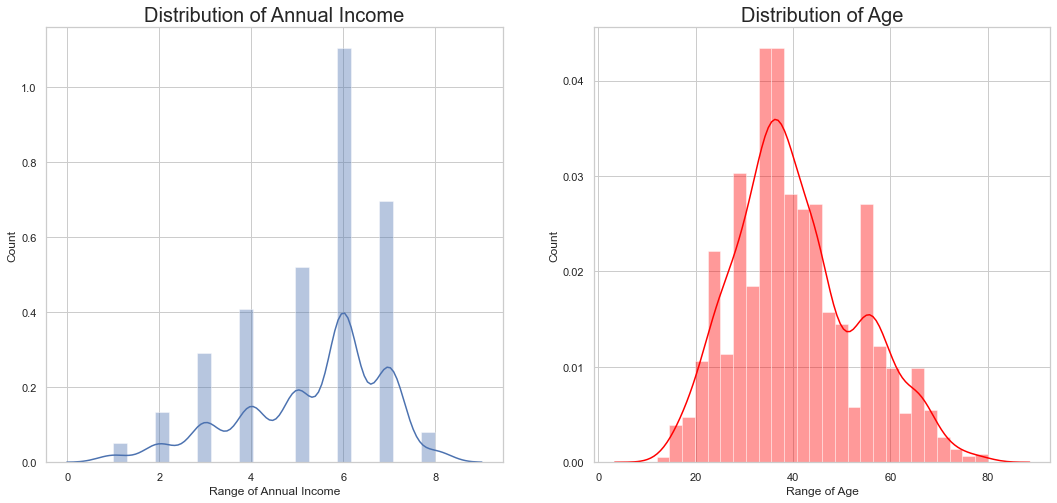

In [145]:
import seaborn as sns
data.describe()

## 画图--年龄和收入
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['S4'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['S3t1'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

## 画多变量图
# sns.pairplot(xdata)
# plt.title('Pairplot for the Data', fontsize = 20)
# plt.show()

## 数据规范化处理

In [100]:
## 标准化处理
from sklearn import preprocessing as pc
from sklearn.cluster import KMeans

Xdata = data[['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E4','num','level']]
xdata = data[['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E4']]
ydata = data[['level']]

#对xdata进行归一化处理
Xdata = Xdata.reset_index().iloc[:,1:]
s_xdata = xdata.apply(lambda x:(x-x.mean())/x.std())

print(s_xdata.shape)
print(ydata.shape)
print(Xdata)

(2158, 16)
(2158, 1)
      S2  S3t1  S4  B2  B3  B4  B5  S6  S7   S9  S11   F1  H2  H4  H5  E4  \
0      2    48   2   2   5   5   6   3   7  8.0    5  2.0  13   4   2   3   
1      2    40   4  19   4   1   1   1   7  2.0    6  2.0   1   2   2   2   
2      2    53   3  19   2   5   7   1   7  2.0    5  1.0   1   2   4   3   
3      2    41   4   8   3   2   1   3   2  4.0    5  2.0   1   3   3   2   
4      1    39   6   3   4   4   1   3   3  6.0    6  2.0   8   1   1   2   
...   ..   ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ..  ..  ..  ..   
2153   2    28   6   3   5   3   1  10   3  4.0    6  2.0  13   3   3   1   
2154   1    40   7   3   5   5   1   1   2  2.0    6  1.0   5   2   2   2   
2155   2    49   7   4   4   3   1   3   4  8.0    5  1.0  12   3   3   2   
2156   2    59   7   3   5   5   1   1   5  5.0    7  1.0  10   4   2   2   
2157   1    45   6   3   5   5   1  10   4  4.0    6  1.0   7   2   1   2   

      num  level  
0       2      1  
1       1      3

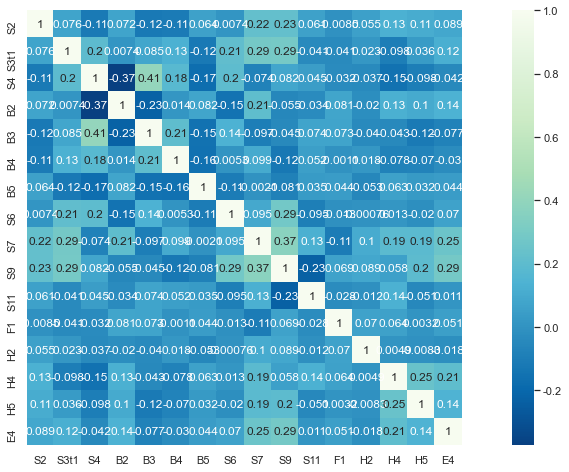

In [57]:
## 计算s_xdata的相关系数矩阵
corr = s_xdata.corr()
# 相关度热力图
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)

In [58]:
## 挑选对y有关系的变量
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(s_xdata, ydata)
score = model.score(s_xdata, ydata)
print(score)
print(model.coef_)   #回归系数
print(model.intercept_)   #截距

0.04508497527002309
[[-0.01208329 -0.07527823  0.09686147  0.0135983   0.01137899 -0.02287747
   0.00163606  0.01334611 -0.07162744  0.01689562  0.01227655 -0.02652811
   0.00860997 -0.02079264 -0.01596462 -0.03372216]]
[1.79101019]


## 因子分析



In [1]:
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [60]:
s_xdata.shape
# xdata

(2158, 16)

相关矩阵特征值： [2.30590568 2.09001415 1.33023032 1.1897003  1.12113477 1.06425733
 0.96984748 0.85658323 0.83689289 0.78707831 0.729513   0.6539369
 0.59204788 0.58935817 0.50771058 0.375789  ]


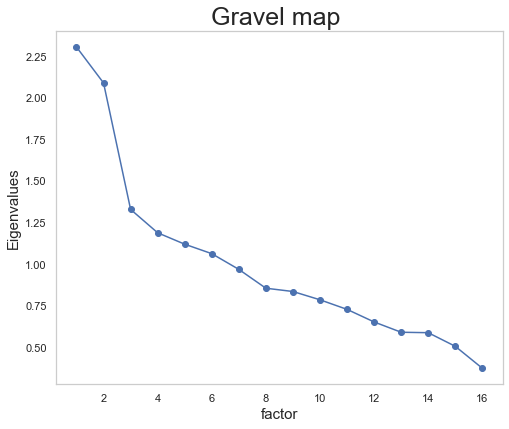

6

In [61]:
#查看相关矩阵特征值
fa = FactorAnalyzer(16, rotation='varimax',method='principal',impute='mean')
fa.fit(s_xdata)
ev, v = fa.get_eigenvalues()
print('相关矩阵特征值：',ev)
#Create scree plot using matplotlib
plt.figure(figsize=(8, 6.5))
plt.scatter(range(1,s_xdata.shape[1]+1),ev)
plt.plot(range(1,s_xdata.shape[1]+1),ev)
plt.title('Gravel map ',fontdict={'weight':'normal','size': 25})
plt.xlabel('factor',fontdict={'weight':'normal','size': 15})
plt.ylabel('Eigenvalues',fontdict={'weight':'normal','size': 15})
plt.grid()
# plt.savefig('E:/suishitu.jpg')
plt.show()

#确定因子个数(提取特征值大于1的因子)
n_factors = sum(ev>1.15)
n_factors    #为6个因子

In [62]:
#取旋转后的结果
fa2 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa2.fit(s_xdata)
#给出贡献率
var = fa2.get_factor_variance()

#计算因子得分
fa2_score = fa2.transform(s_xdata)

#得分表
column_list = ['fac'+str(i) for i in np.arange(n_factors)+1]
fa_score = pd.DataFrame(fa2_score,columns=column_list)
for col in fa_score.columns:
    Xdata[col] = fa_score[col]
print("\n各因子得分:\n",fa_score)    

#方差贡献表
df_fv = pd.DataFrame()
df_fv['因子'] = column_list
df_fv['方差贡献'] = var[1]
df_fv['累计方差贡献'] = var[2]
df_fv['累计方差贡献占比'] = var[1]/var[1].sum()
print("\n方差贡献表:\n",df_fv) 


各因子得分:
           fac1      fac2      fac3      fac4      fac5      fac6
0     1.348662 -0.214035 -0.420511 -0.353266  1.612009  0.952715
1     0.581354 -1.194045 -0.591724  0.048165 -0.087188 -0.231701
2     1.532481 -2.749727 -0.311208 -0.525698 -1.071914 -1.989394
3     0.542850 -0.345637 -1.600188 -1.201635 -0.455851  0.279287
4    -0.830468  0.589961  0.247739 -0.625646  0.258079  0.658501
...        ...       ...       ...       ...       ...       ...
2153 -0.074476  1.671933 -1.051909  0.073581  1.491537  1.148405
2154 -0.739683  0.777578  0.542749  0.601378 -1.069548 -0.458841
2155  0.334651  0.947240 -0.511577 -1.102031  1.380625 -0.732101
2156  0.402391  1.155405  0.883298  1.690881  1.230430 -1.002711
2157 -0.398548  1.356484  0.851234 -0.232683 -0.291113 -0.746413

[2158 rows x 6 columns]

方差贡献表:
      因子      方差贡献    累计方差贡献  累计方差贡献占比
0  fac1  0.122029  0.122029  0.214527
1  fac2  0.113893  0.235922  0.200225
2  fac3  0.093158  0.329081  0.163772
3  fac4  0.087030  0.4161

In [63]:
Xdata

,S2,S3t1,S4,B2,B3,B4,B5,S6,S7,S9,...,H5,E4,num,level,fac1,fac2,fac3,fac4,fac5,fac6
0,2,48,2,2,5,5,6,3,7,8.0,...,2,3,2,1,1.348662,-0.214035,-0.420511,-0.353266,1.612009,0.952715
1,2,40,4,19,4,1,1,1,7,2.0,...,2,2,1,3,0.581354,-1.194045,-0.591724,0.048165,-0.087188,-0.231701
2,2,53,3,19,2,5,7,1,7,2.0,...,4,3,1,1,1.532481,-2.749727,-0.311208,-0.525698,-1.071914,-1.989394
3,2,41,4,8,3,2,1,3,2,4.0,...,3,2,1,1,0.542850,-0.345637,-1.600188,-1.201635,-0.455851,0.279287
4,1,39,6,3,4,4,1,3,3,6.0,...,1,2,2,1,-0.830468,0.589961,0.247739,-0.625646,0.258079,0.658501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2,28,6,3,5,3,1,10,3,4.0,...,3,1,1,2,-0.074476,1.671933,-1.051909,0.073581,1.491537,1.148405
2154,1,40,7,3,5,5,1,1,2,2.0,...,2,2,1,2,-0.739683,0.777578,0.542749,0.601378,-1.069548,-0.458841
2155,2,49,7,4,4,3,1,3,4,8.0,...,3,2,2,1,0.334651,0.947240,-0.511577,-1.102031,1.380625,-0.732101
2156,2,59,7,3,5,5,1,1,5,5.0,...,2,2,1,3,0.402391,1.155405,0.883298,1.690881,1.230430,-1.002711


In [64]:
## 计算综合得分及排名(综合得分=累计方差贡献占比1 * 因子得分1 + 累计方差贡献占比2 * 因子得分2 + …)
Xdata['factor_score'] = ((var[1]/var[1].sum())*fa2_score).sum(axis=1)
Xdata = Xdata.sort_values(by='factor_score',ascending=False).reset_index(drop=True)
Xdata['rank'] = Xdata.index+1
print(Xdata)

      S2  S3t1  S4  B2  B3  B4  B5  S6  S7   S9  ...  num  level      fac1  \
0      2    51   7   3   5   5   1   4   6  5.0  ...    2      3  2.409059   
1      2    45   8   4   5   5   2   6   7  3.0  ...    2      1  2.563437   
2      2    47   8   4   5   5   1   4   7  8.0  ...    1      2  2.294707   
3      2    59   7   3   5   5   1  10   5  4.0  ...    5      1  1.159941   
4      2    37   6  17   4   5   1   4   6  8.0  ...    1      2  3.080636   
...   ..   ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...    ...       ...   
2153   1    26   3   4   1   2   2   1   3  1.0  ...    1      3 -1.727601   
2154   1    26   1  15   2   3   5   1   1  1.0  ...    2      3 -1.207535   
2155   1    26   1  11   1   2   2   1   1  2.0  ...    1      3 -2.030794   
2156   2    20   1  15   1   2   2   1   2  1.0  ...    1      1 -1.287868   
2157   1    36   1   6   1   2   2   1   1  2.0  ...    1      1 -2.390894   

          fac2      fac3      fac4      fac5      fac6  factor_

In [65]:
### 用因子得分与因变量做回归
# x=fa_score  y=ydata
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model.fit(fa_score, ydata)   # 线性回归建模
print('系数矩阵:\n',model.coef_)
print('截距:\n',model.intercept_ )

ydata = ydata.reset_index()['level']
est = sm.OLS(ydata, fa_score)
est2 = est.fit()
print(est2.summary())

系数矩阵:
 [[-0.09886262  0.08100978 -0.03809127  0.00911352 -0.03979753  0.01739838]]
截距:
 [1.79101019]
                                 OLS Regression Results                                
Dep. Variable:                  level   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.870
Date:                Mon, 01 Feb 2021   Prob (F-statistic):                      0.0823
Time:                        09:59:03   Log-Likelihood:                         -4499.4
No. Observations:                2158   AIC:                                      9011.
Df Residuals:                    2152   BIC:                                      9045.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 co

## 决策树

In [146]:
# X=Xdata[['fac1','fac2','fac3','fac4','fac5','fac6']]  
X=Xdata[['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E4']]
Y=Xdata['level']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)

(2158, 16)
(2158,)
(1510, 16)
(648, 16)


In [147]:
clf = DecisionTreeClassifier(random_state=3) # 初始化
clf = clf.fit(Xtrain,Ytrain) # 拟合
score_ = clf.score(Xtest, Ytest) # 验证集查看得分，这个得分好像就是分类的准确率

# 可以输入数据送到训练好的模型里，输出预测的类
y_pred = clf.predict(Xtest)
score_

0.44907407407407407

In [148]:
#生成决策树
from sklearn.tree import DecisionTreeClassifier
#设置最大叶子数为8
dtModel = DecisionTreeClassifier(max_leaf_nodes=10) 

#模型检验－交叉验证法
from sklearn.model_selection import cross_val_score
cross_val_score(dtModel,X,Y,cv=10) 

#训练模型
dtModel=dtModel.fit(X,Y) 

In [149]:
#模型可视化
import pydotplus
from six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz

dot_data = StringIO() #把文件暂时写在内存的对象中

export_graphviz(
    dtModel,
    out_file=dot_data,
    class_names=['1','2','3'],
    feature_names=['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S9','S11','F1','H2','H4','H5','E4'],
    filled=True,rounded=True,special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

True

## 聚类分析

In [312]:
## 导入价值观数据
consume_value = pd.read_excel('Consumer Value Builder - 20201209(1).xlsx')
# consume_value.head()

consume=data[['S4','S7','B1s1','B1s2','B1s3','B1s4','B1s5','B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15','B1s16','B1s17','B1s18','B1s19','B1s20']]
consume=consume.reset_index().iloc[:,1:]
print(consume.shape)
# consume

s_consume = consume.apply(lambda x:(x-x.mean())/x.std())  #规范化
# s_consume
s_consume.shape

(2158, 22)


(2158, 22)

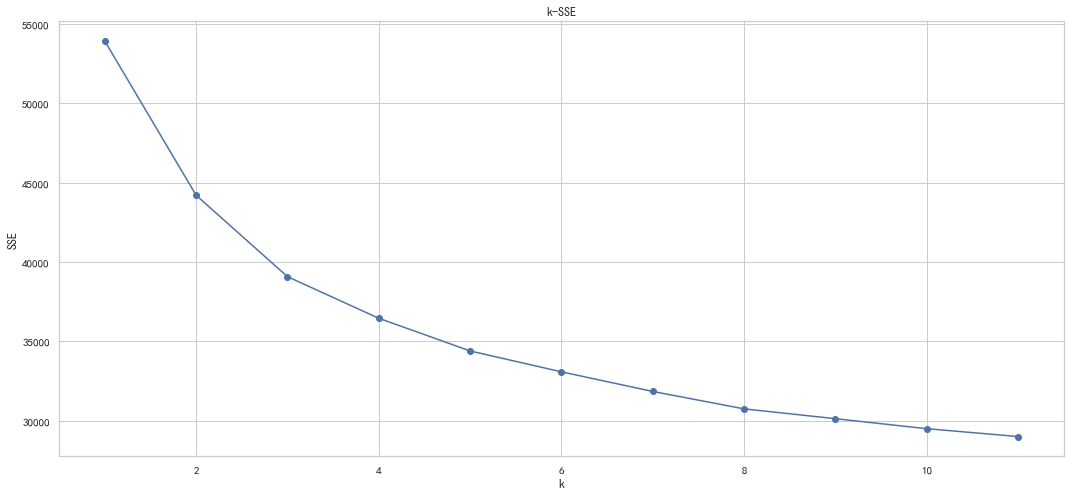

In [313]:
## 选取最优聚类数k
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
SSE = []  # 存放每次结果的误差平方和
for k in range(1,12):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(consume)
    SSE.append(estimator.inertia_)
X = range(1,12)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('k-SSE') 
plt.plot(X,SSE,'o-')
plt.savefig('SSE.png')
plt.show()

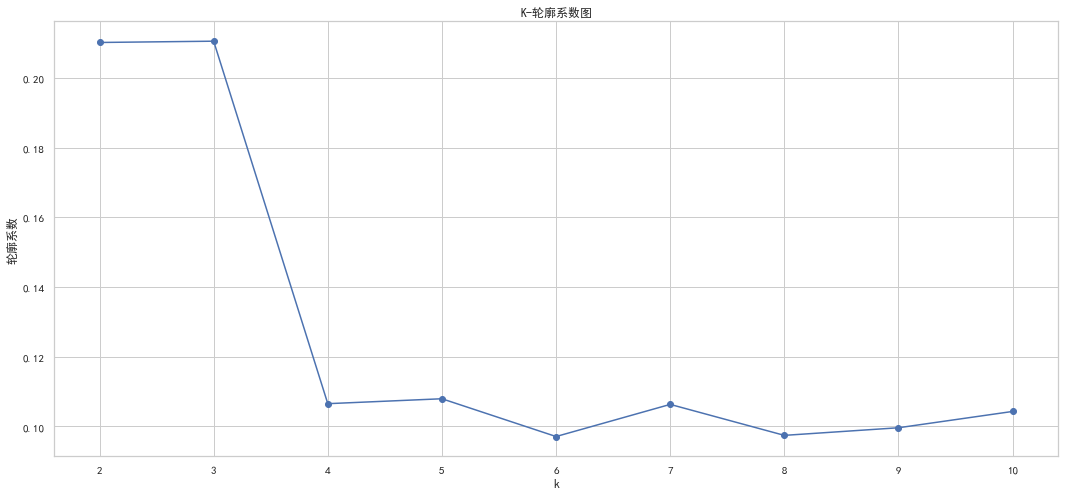

In [314]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Scores = []  # 存放轮廓系数
for k in range(2,11):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(consume)
    Scores.append(silhouette_score(consume,estimator.labels_,metric='euclidean'))
X = range(2,11)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.title('K-轮廓系数图') 
plt.plot(X,Scores,'o-')
plt.savefig('轮廓系数.png')
plt.show()

In [315]:
import pandas as pd
#参数初始化
k = 5 #聚类的类别
iteration = 10 #聚类最大循环次数

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类
#model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(s_consume) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
print(r)
r.columns = list(consume.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([consume, pd.Series(model.labels_, index =consume.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(consume.columns) + [u'聚类类别'] #重命名表头
# r.to_excel(outputfile) #保存结果
# print(r)

         0         1         2         3         4         5         6   \
0 -0.606925  0.098738 -1.408174 -1.356752 -1.198475 -0.713825 -1.494286   
1 -0.536050  1.160546  0.103548 -0.286278 -0.566511 -0.934429  0.204964   
2  0.472757 -0.336352  0.054971  0.070061  0.132076  0.262831 -0.270976   
3  0.301786 -0.188200  0.487125  0.597894  0.617102  0.563963  0.441390   
4 -1.252103 -0.916000 -1.251626 -0.884479 -0.669463 -0.521731  0.111075   

         7         8         9   ...        13        14        15        16  \
0 -1.615205 -0.526951 -1.179315  ... -1.320985 -1.467900 -1.619080 -1.429259   
1  0.349951 -0.626532 -0.647654  ... -0.517740 -0.058012 -0.097841 -0.292089   
2 -0.307180 -0.089332  0.096011  ...  0.034274 -0.000182 -0.094752 -0.059286   
3  0.376635  0.573106  0.662952  ...  0.524270  0.509979  0.440093  0.499206   
4  0.331720 -0.189501 -0.558052  ...  0.192999 -0.645483  0.359240  0.219539   

         17        18        19        20        21   0   
0 -1.2943

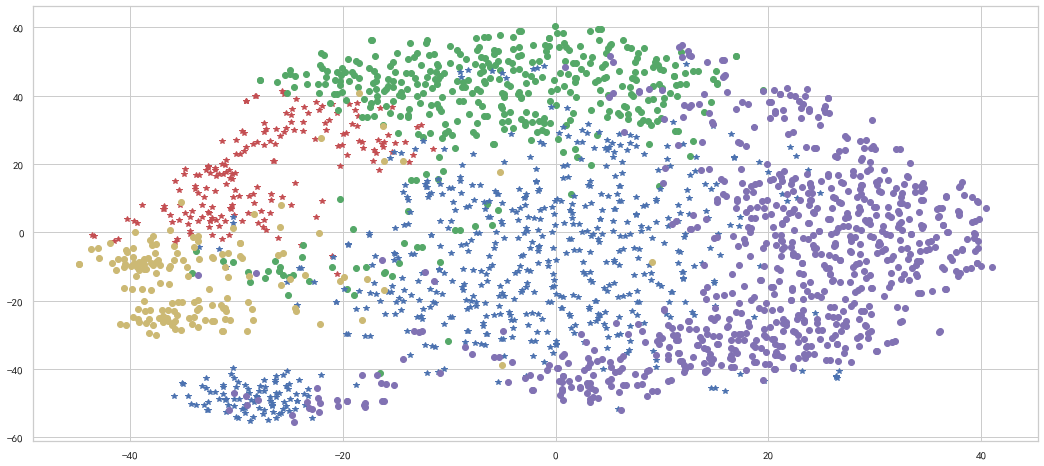

In [316]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(consume) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = consume.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r*')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'mo')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'yo')
# d = tsne[r[u'聚类类别'] == 5]
# plt.plot(d[0], d[1], 'k*')
plt.savefig('cluster.png')
plt.show()

In [317]:
## 聚类结果分析
# 将聚类结果带入原始数据
data["target"]=target
result_avg=data.groupby("target").mean()
result_avg=result_avg.join(data.target.value_counts())
result_avg.columns=["工作日上班时期电话时长","工作日下班时期电话时长","周末电话时长","国际电话时长","总通话时长","平均每次通话时长","人数统计"]
result_avg["人员占比"]=result_avg["人数统计"]/sum(result_avg["人数统计"])

,S4,S7,B1s1,B1s2,B1s3,B1s4,B1s5,B1s6,B1s7,B1s8,...,B1s12,B1s13,B1s14,B1s15,B1s16,B1s17,B1s18,B1s19,B1s20,聚类类别
0,2,7,4,2,1,4,4,5,2,4,...,4,4,3,3,5,5,5,3,4,1
1,4,7,4,5,4,3,4,4,5,4,...,4,4,4,5,4,4,4,4,4,2
2,3,7,4,3,3,3,4,4,3,3,...,3,4,3,3,3,3,3,3,3,0
3,4,2,4,3,3,4,3,3,4,3,...,4,3,3,4,3,3,4,3,3,0
4,6,3,5,4,4,3,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,6,3,5,5,4,4,4,3,4,4,...,5,5,4,4,5,3,3,3,4,2
2154,7,2,4,5,4,4,4,4,1,4,...,4,5,4,5,4,4,4,5,3,2
2155,7,4,5,5,5,5,5,4,5,4,...,4,5,4,4,5,5,4,5,5,3
2156,7,5,4,4,4,4,4,5,4,5,...,4,5,5,5,4,4,4,4,4,3


## 层次聚类

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(consume, method='ward'))

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(consume)
labels = model.labels_
labels

## 热力图
sns.clustermap(consume,method ='ward',metric='euclidean')

### 决策树

In [284]:
Y=Xdata['level']
X=consume

#生成决策树
from sklearn.tree import DecisionTreeClassifier
#设置最大叶子数为8
dtModel = DecisionTreeClassifier(max_leaf_nodes=15) 

#模型检验－交叉验证法
from sklearn.model_selection import cross_val_score
cross_val_score(dtModel,X,Y,cv=10) 

#训练模型
dtModel=dtModel.fit(X,Y) 

#模型可视化
import pydotplus
from six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz

dot_data = StringIO() #把文件暂时写在内存的对象中

export_graphviz(
    dtModel,
    out_file=dot_data,
    class_names=['1','2','3'],
    feature_names=['S4','S7','B1s1','B1s2','B1s3','B1s4','B1s5','B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15','B1s16','B1s17','B1s18','B1s19','B1s20'],
    filled=True,rounded=True,special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('consume_tree.png')

True

array([3, 3, 2, ..., 1, 1, 1], dtype=int64)

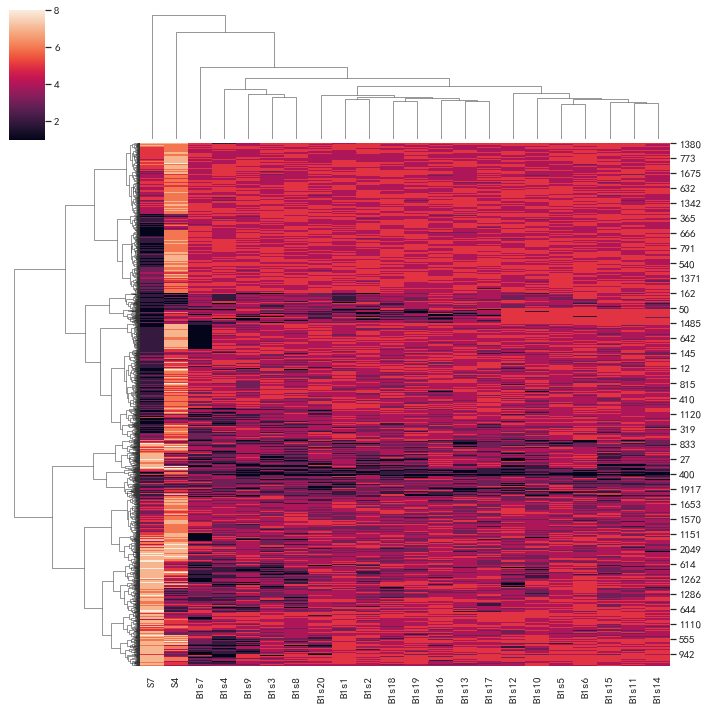